# Dataset verification notebook

The goal of this notebook is to provide graphical tools for those that want to check or classify the dataset. These tools include: a visual classification tool for events and potential events, a comparison with the END2END dataset to determine which patches were not included in this dataset and why, and additional tools to see the images and the comparison plots among its masks. Each cell of this notebook has been designed such that they can be run independently.

In [1]:
%load_ext autoreload
%autoreload 2

## Classification tool for events
This tool presents the masks comparison plots for the detected events, and allows the user to classify the image as an event, potential event or not event. The tool considers 50 patches per run, to reduce the workload of the classification user. Additionally, when the tool is stopped and executed again, those events that were already classified don't appear, and only those that are not classified yet. The classfication results are written in a txt file stored in the dataset main directory.

The controls of the tool are:
- e: classify the patch as event
- p: classify the patch as potential event
- n: classify the patch as not event
- ESC: close the tool

In case any other key is pressed, the tool continues in the same image. If an event is misclassified, the only way to do it at the moment is to go to the txt file where you misclassified the event, remove the last line and insert it in the correct txt file.

In [2]:
import os
import cv2
import pickle
import random
import numpy as np
from pathlib import Path

from constants import DATASET_PATH


def normalize_0_1_float(band):
    # Function that converts 16bits images into 8bits images
    band_max, band_min = band.max(), band.min()
    return (((band - band_min) / ((band_max - band_min))) ).astype(np.float32)

# Path to the directory containing images
not_events_dir = os.path.join(DATASET_PATH,'images','notevent','NIR_SWIR')
not_events_dir = os.path.join(DATASET_PATH,'masks','event','comparison','voting_4')

#These lines create the empty txt files
# Path(os.path.join(DATASET_PATH,'events_list.txt')).touch(exist_ok=True)
# Path(os.path.join(DATASET_PATH,'not_events_list.txt')).touch(exist_ok=True)
# Path(os.path.join(DATASET_PATH,'potential_events_list.txt')).touch(exist_ok=True)


# Get list of image files in the directory
image_files = [f for f in os.listdir(not_events_dir) if f.endswith(('.pkl'))]
random.shuffle(image_files)
# cont =0
# repeated_condition = False

# def classify_patch(key,image_file):
#     repeated_condition = False
#     misclick_condition = False
#     break_condition = False

#     if key == ord('e'):
#         txt_name = 'events_list.txt' # Events
#         misclick_condition = False
#     elif key == ord('n'):
#         txt_name = 'not_events_list.txt' # Not events
#         misclick_condition = False
#     elif key == ord('p'):
#         txt_name = 'potential_events_list.txt' #Potential events
#         misclick_condition = False
#     elif key == 27: #ESC key
#         break_condition = True

#     else:
#         misclick_condition = True

#     if not misclick_condition and not break_condition:
#         with open(os.path.join(DATASET_PATH,txt_name),'r+') as f:
#             for name in f:
#                 if name == f'{image_file}\n':
#                     repeated_condition = True
#                     break
#             if not repeated_condition:
#                 f.write(f'{image_file}\n')    
#     return misclick_condition,break_condition

# def check_already_classified_patch(image_name):
    
#     already_classified_condition = False
#     for patch_type in ['events_list.txt','not_events_list.txt','potential_events_list.txt']:

#         with open(os.path.join(DATASET_PATH,patch_type),'r') as f:
#             for classified_name in f.readlines():

#                 if image_name == classified_name.rstrip('\n'):
#                     already_classified_condition =True
#                     break
#     return already_classified_condition

cont = 0

for idx,image_file in enumerate(image_files):

    image_path = os.path.join(not_events_dir,image_file)
    with open(image_path,'rb') as file:
        image = normalize_0_1_float(pickle.load(file))    

    cv2.imshow(f'{image_file[:-4]}', image)
    key = cv2.waitKey(0)
    if key == 27:
        cv2.destroyAllWindows()        
        break
    # if idx>20: break

    # already_classified = check_already_classified_patch(image_name=image_file)
    
    # if not already_classified:
    #     image = cv2.imread(os.path.join(potential_events_dir, image_file))
    #     cv2.imshow(f'{image_file[:-4]}', image)
    
    #     while True:
    #         key = cv2.waitKey(0)
    #         misclick_condition,break_condition = classify_patch(key,image_file)    
    #         if break_condition: break
    #         if not misclick_condition: break

    #     if break_condition: 
    #         cv2.destroyAllWindows()        
    #         break
    #     cv2.destroyAllWindows()
    #     cont +=1
    #     if cont>50:
    #         break


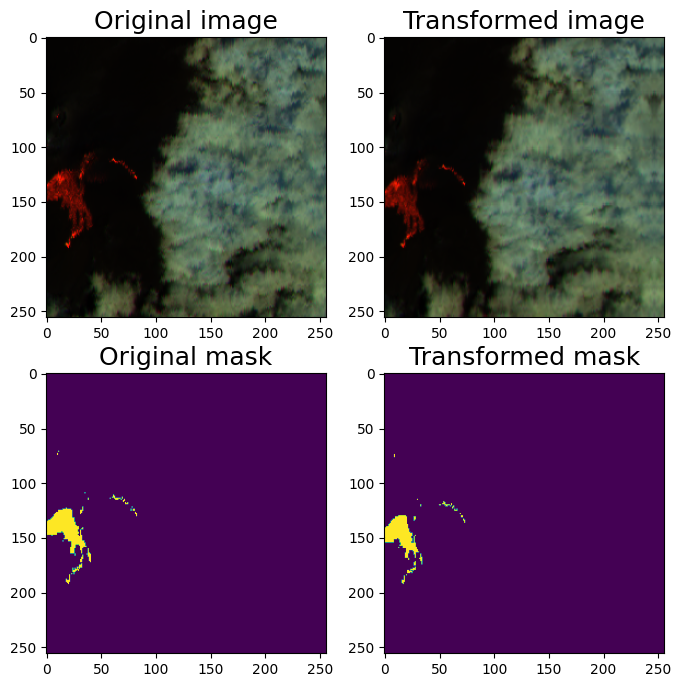

In [192]:

import albumentations as albu
import matplotlib.pyplot as plt
import cv2
import random
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)


mask_path = '/media/cristopher/fbd12065-9eb2-4d02-8a65-1216bb0d6c22/datasets/main_dataset/masks/event/comparison/voting_4/Etna_00_G2_(192, 0, 448, 256)_mask_voting_4.pkl'
image_path = '/media/cristopher/fbd12065-9eb2-4d02-8a65-1216bb0d6c22/datasets/main_dataset/images/event/NIR_SWIR/Etna_00_G2_(192, 0, 448, 256)_NIR_SWIR.pkl'

with open(mask_path,'rb') as file:
    mask = normalize_0_1_float(pickle.load(file))

with open(image_path,'rb') as file:
    image = normalize_0_1_float(pickle.load(file))   


# aug = albu.ElasticTransform(p=1, alpha=2, sigma=1 * 0.05, alpha_affine=5 * 0.03)
aug = albu.GridDistortion(p=1,distort_limit=0.2)
aug = albu.ColorJitter(p=1,brightness=(0.75,1.25),contrast=(0.75,1.25),saturation=0,hue=0)
# aug = albu.CLAHE(p=1)
# aug = albu.ChromaticAberration(p=1,primary_distortion_limit=1)
# random.seed(7)
augmented = aug(image=image, mask=mask)
image_elastic = augmented['image']
mask_elastic = augmented['mask']
visualize(image_elastic, mask_elastic, original_image=image, original_mask=mask)


## Classification tool for potential events
This tool presents the masks comparison plots for the detected potential events, and allows the user to classify the image as an event, not event or as unsure potential event. This tool is the same as the previous tool, but changes the classification outputs. In this case, the tool considers 100 patches per run, as there are more potential events than events. Additionally, when the tool is stopped and executed again, those potential events that were already classified don't appear, and only those that are not classified yet. The classfication results are written in a txt file stored in the dataset main directory.

The controls of the tool are:
- e: classify the patch as event
- n: classify the patch as not event
- d: classify the patch as unsure potential event
- ESC: close the tool

In case any other key is pressed, the tool continues in the same image. If an event is misclassified, the only way to do it at the moment is to go to the txt file where you misclassified the event, remove the last line and insert it in the correct txt file.

In [2]:
##### Classify the potential events detected
import os
import re
import cv2
from pathlib import Path
from constants import DATASET_PATH
cont = 0

Path(os.path.join(DATASET_PATH,'unsure_potential_events_list.txt')).touch(exist_ok=True)

def check_already_classified_potential_events(image_name):
    
    already_classified_condition = False
    # for patch_type in ['events_list.txt','not_events_list.txt']:
    for patch_type in ['events_list.txt','not_events_list.txt','unsure_potential_events_list.txt']:

        with open(os.path.join(DATASET_PATH,patch_type),'r') as f:
            for classified_name in f.readlines():

                if image_name == classified_name.rstrip('\n'):
                    
                    already_classified_condition =True
                    break
    return already_classified_condition

events_dir = os.path.join(DATASET_PATH,'masks','event','comparison','comparison_plot','voting_4')

potential_events_dir = os.path.join(DATASET_PATH,'masks/potential_events/comparison/comparison_plot/voting_2/')
potential_events_dir = os.path.join(DATASET_PATH,'masks','potential_event','comparison','comparison_plot','voting_2')

with open(os.path.join(DATASET_PATH,'potential_events_list.txt'),'r') as file:
    potential_events_list = [re.match(r'(.+)_comparison',detected_event.rstrip()).group(1) for detected_event in file.readlines()]

for potential_events in potential_events_list:
    # print(potential_events_dir,potential_events+'_comparison.png')
    # image = cv2.imread(os.path.join(potential_events_dir,potential_events+'_comparison.png'))
    already_classified = check_already_classified_potential_events(image_name=potential_events)
    if not already_classified:
        
        image = cv2.imread(os.path.join(events_dir,potential_events+'_comparison.png'))
        if image is None:
            image = cv2.imread(os.path.join(potential_events_dir,potential_events+'_comparison.png'))
        cv2.imshow(f'{potential_events}', image)
        while True:
            key = cv2.waitKey(0)
            misclick_condition,break_condition = classify_patch(key,potential_events)
            if break_condition: break
            if key == ord('e') or key == ord('n'):
                with open(os.path.join(DATASET_PATH,'classified_potential_events_list.txt'),'a') as file_1:
                    file_1.write(potential_events+'\n')

            if key == ord('d'): 

                with open(os.path.join(DATASET_PATH,'unsure_potential_events_list.txt'),'a') as file_2:
                    file_2.write(potential_events+'\n')
                
                break # Go to the next image
            if not misclick_condition:
                break
        if break_condition: 
            cv2.destroyAllWindows()
            break
        cv2.destroyAllWindows()
        cont +=1
        if cont>100:
            break

FileNotFoundError: [Errno 2] No such file or directory: '/home/cristopher/Desktop/SegTHRawS/datasets/main_dataset/potential_events_list.txt'

## Comaprison with END2END
This cell compares the events that were classified as events with the previous tools and checks if that same patch was included in the events of the END2END database. This ensures that the events already classified in the END2END are also included in this dataset.

The problem with the actual dataset is that it was created with a different band alignment than that of END2END, and most of the patches won't coincide. Additionally, the END2END dataset included additional patches that couldn't be detected by this dataset because the corner coordinates do not coincide, as this example: "Latvia_0_G0_(768, 881, 1024, 1137)_A3492.21.pkl". The objective with these granules ensured that the events in the borders were fully included. 

The output of the cell are four lists: correct_events, additional_events, names_not_detected, wrongly_detected and impossible_to_detect. Correct events are those that are included in the END2END dataset, whereas additional_events are those not included. Inside additional_events there are: *impossible_to_detect* to those patches that don't have the same corners as the dataset, *names_not_detected* to those patches that are not marked as events in the actual dataset, and *wrongly_detected* to those name_not_detected patches that are events in the END2END dataset but are classified as potential_event or not_event in the actual dataset.

In [19]:
import os
import re
import sys
import pickle
import numpy as np

sys.path.insert(1,'..')
from utils import normalize_to_0_to_1,normalize

events_txt = os.path.join(os.getcwd(),'dataset','events_list.txt')

E2E_database_path = '/home/cristopher/Documents/PyRawS/modifications_cristopher/THRAWS_END2END'

train_events_E2E = [os.path.join(E2E_database_path,'TrainVal','event',event_name) for event_name in os.listdir(os.path.join(E2E_database_path,'TrainVal','event'))]
test_events_E2E = [os.path.join(E2E_database_path,'Test','event',event_name) for event_name in os.listdir(os.path.join(E2E_database_path,'Test','event'))]

events_E2E = train_events_E2E + test_events_E2E

correct_events = []
additional_events = []
names_not_detected = []
impossile_to_detect = []
wrongly_detected = []
break_condition = False



for event in events_E2E:
    event_name = re.match(r'(.+)_A',os.path.basename(event)).group(1)
    with open(events_txt,'r') as file:
        
        new_events_list = [re.match(r'(.+)_comparison',detected_event.rstrip()).group(1) for detected_event in file.readlines()]
    if event_name in new_events_list: 
        correct_events.append(event)
    if event_name not in new_events_list: 
        additional_events.append(event)

        with open(event,'rb') as f:
            image = normalize_to_0_to_1(pickle.load(f))
        image_name = re.match(r'(.+)_A',os.path.basename(event)).group(1)
        
        ymin,xmin,ymax,xmax = (np.array(re.findall(r'\((.+), (.+), (.+), (.+)\)',os.path.basename(image_name))[0]).astype(int))
        
        if np.array([ymin%192,xmin%192,(ymax-256)%192,(xmax-256)%192]).any() !=0:
            impossile_to_detect.append(event)
        else:
            names_not_detected.append(event)
            
            for root,_,files in os.walk(os.path.join(os.getcwd(),'dataset','images')):
                for file in files:
                    if file == f'{image_name}_NIR_SWIR.pkl':
                        wrongly_detected.append(os.path.join(root,file))
                        
                        with open(os.path.join(root,file), 'rb') as new_file:
                            dataset_image = pickle.load(new_file)[:,:,::-1]

                        break_condition = True
                        break
                if break_condition:
                    break_condition = False
                    break


    
print(len(correct_events))
print(len(names_not_detected), len(wrongly_detected),len(impossile_to_detect))


203
191


In [33]:
import pickle
import sys
import numpy as np
sys.path.insert(1,'..')
from utils import normalize_to_0_to_1,normalize


names_not_detected = []
impossile_to_detect = []
wrongly_detected = []
break_condition = False

column = np.ones((256,3,3))

for event_path in additional_events:
    with open(event_path,'rb') as f:
        image = normalize_to_0_to_1(pickle.load(f))
    image_name = re.match(r'(.+)_A',os.path.basename(event_path)).group(1)
    # print(image_name)
    ymin,xmin,ymax,xmax = (np.array(re.findall(r'\((.+), (.+), (.+), (.+)\)',os.path.basename(image_name))[0]).astype(int))
    # print(ymin,xmin,ymax,xmax)
    # print(ymin%192,xmin%192,(ymax-256)%192,(xmax-256)%192)
    
    if np.array([ymin%192,xmin%192,(ymax-256)%192,(xmax-256)%192]).any() !=0:
        # print(image_name)

        # print(ymin,xmin,ymax,xmax)
        # print(ymin%192,xmin%192,(ymax-256)%192,(xmax-256)%192)
        impossile_to_detect.append(event_path)
    else:

        names_not_detected.append(event_path)
    # break
        

        for root,_,files in os.walk(os.path.join(os.getcwd(),'dataset','images')):
            for file in files:
                if file == f'{image_name}_NIR_SWIR.pkl':
                    wrongly_detected.append(os.path.join(root,file))
                    
                    with open(os.path.join(root,file), 'rb') as new_file:
                        dataset_image = pickle.load(new_file)[:,:,::-1]

                    break_condition = True
                    break
            if break_condition:
                break_condition = False
                break

print(len(names_not_detected), len(wrongly_detected))
print(len(impossile_to_detect),len(additional_events))

61 61
130 191


## Visualization tool for events
This tool displays the images of the events and if specified by the user, the masks comparison plot of that image.

The controls of this tool are:
- m: Display the masks comparison plot of the event
- n: Advance to the next event
- ESC: close the tool

In case any other key is pressed, the tool continues in the same image. 

In [2]:
#### PART OF THE CODE THAT SHOW THE EVENTS AND THE MASKS

import numpy as np
import pickle
import re
import os
import cv2

from constants import DATASET_PATH

events_dataset_path = os.path.join(DATASET_PATH,'images','event','NIR_SWIR')
comparison_events_dataset_path = os.path.join(DATASET_PATH,'masks','event','comparison','comparison_plot')

comparison = False
comparison_name = False



for event_name in os.listdir(events_dataset_path):
    event_path = os.path.join(events_dataset_path,event_name)
    with open(event_path,'rb') as event_file:
        NIR_SWIR_patch = pickle.load(event_file)
    
    NIR_SWIR_patch_res = cv2.resize(NIR_SWIR_patch[:,:,::-1],(NIR_SWIR_patch.shape[1]*3,NIR_SWIR_patch.shape[0]*3))
    cv2.imshow(f'{event_name}',NIR_SWIR_patch_res)
    
    key = cv2.waitKey(0)

    if key == ord('m'):# Plot masks
        comparison_name = re.match(r'(.+)_NIR_SWIR',event_name).group(1)
        for root,_,files in os.walk(comparison_events_dataset_path):
            for file in files:
                if re.match(r'(.+)_comparison',file):
                    comparison_plot_name = re.match(r'(.+)_comparison',file).group(1)
                    if comparison_plot_name == comparison_name:
                        # print(file)
                        comparison_image = cv2.imread(os.path.join(root,file))
        comparison_image_res = cv2.resize(comparison_image,(int(comparison_image.shape[1]*0.9),int(comparison_image.shape[0]*0.8)))
        cv2.imshow(f'{comparison_name} masks',comparison_image_res)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    elif key == 27:# ESC key
        cv2.destroyAllWindows()
        break
    
    elif key == ord('n'):
        cv2.destroyAllWindows()
    else:
        print(f'The key {chr(key)} has not specified a function, try again.')
    

## Visualization tool for potential events
This tool displays the images of the potential events and if specified by the user, the masks comparison plot of that image.

The controls of this tool are:
- m: Display the masks comparison plot of the event
- n: Advance to the next event
- ESC: close the tool

In case any other key is pressed, the tool continues in the same image. 

In [ ]:
#### PART OF THE CODE THAT SHOW THE POTENTIAL EVENTS AND THEIR RESPECTIVE MASKS

import numpy as np
import pickle
import re
import os
import cv2

events_dataset_path = os.path.join(os.getcwd(),'dataset','images','event','NIR_SWIR')
potential_events_dataset_path = os.path.join(os.getcwd(),'dataset','images','potential_event','NIR_SWIR')

comparison_events_dataset_path = os.path.join(os.getcwd(),'dataset','masks','events','comparison','comparison_plot')
comparison_potential_events_dataset_path = os.path.join(os.getcwd(),'dataset','masks','potential_events','comparison','comparison_plot')

comparison = False
comparison_name = False

with open(os.path.join(os.getcwd(),'dataset','potential_events_list.txt'),'r') as file:
    potential_events_list = [re.match(r'(.+)_comparison',detected_event.rstrip()).group(1) for detected_event in file.readlines()]

# for event_name in os.listdir(events_dataset_path):
for event_name in potential_events_list:
    
    event_name = event_name +'_NIR_SWIR.pkl'
    event_path = os.path.join(events_dataset_path,event_name)
    try:
        event_path = os.path.join(events_dataset_path,event_name)
        with open(event_path,'rb') as event_file:
            NIR_SWIR_patch = pickle.load(event_file)
    except FileNotFoundError:
        event_path = os.path.join(potential_events_dataset_path,event_name)
        with open(event_path,'rb') as event_file:
           NIR_SWIR_patch = pickle.load(event_file)    

    NIR_SWIR_patch_res = cv2.resize(NIR_SWIR_patch[:,:,::-1],(NIR_SWIR_patch.shape[1]*3,NIR_SWIR_patch.shape[0]*3))


    cv2.imshow(f'{event_name}',NIR_SWIR_patch_res)
    key = cv2.waitKey(0)
    # print(key,ord('m'))
    if key == ord('m'):# Plot masks
        comparison_name = re.match(r'(.+)_NIR_SWIR',event_name).group(1)

        
        for root,_,files in os.walk(comparison_events_dataset_path):
            for file in files:
                if re.match(r'(.+)_comparison',file):
                    
                    comparison_plot_name = re.match(r'(.+)_comparison',file).group(1)
                    print(comparison_plot_name,comparison_name)
                    if comparison_plot_name == comparison_name:
                        print(file)
                        comparison_image = cv2.imread(os.path.join(root,file))
        comparison_image_res = cv2.resize(comparison_image,(int(comparison_image.shape[1]*0.9),int(comparison_image.shape[0]*0.8)))
        cv2.imshow(f'{comparison_name} masks',comparison_image_res)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        # break

    
    elif key == 27:# ESC key
        cv2.destroyAllWindows()
        break
    elif key == ord('n'):
        cv2.destroyAllWindows()
    else:
        print(f'The key {chr(key)} has not specified a function, try again.')
        

    

In [1]:
import os
import re
import pickle
import matplotlib.pyplot as plt
import numpy as np

events_dataset_path = os.path.join(os.getcwd(),'dataset','images','event','NIR_SWIR')
potential_events_dataset_path = os.path.join(os.getcwd(),'dataset','images','potential_event','NIR_SWIR')

events_path = [os.path.join(events_dataset_path,event_path) for event_path in os.listdir(events_dataset_path)]
# potential_events_path = [os.path.join(potential_events_dataset_path,potential_event_path) for potential_event_path in os.listdir(potential_events_dataset_path)]

comparison_events_dataset_path = os.path.join(os.getcwd(),'dataset','masks','event','comparison','comparison_plot','voting_intersection')
os.makedirs(comparison_events_dataset_path, exist_ok=True)
# images_path = events_path + potential_events_path
voting_4_path = os.path.join(os.getcwd(),'dataset','masks','event','comparison','voting_4')
voting_2_path = os.path.join(os.getcwd(),'dataset','masks','event','comparison','voting_2')
voting_3_path = os.path.join(os.getcwd(),'dataset','masks','event','comparison','voting_3')
intersection_path = os.path.join(os.getcwd(),'dataset','masks','event','comparison','intersection')

for image_path in events_path:
    # event_condition = os.path.basename(os.path.dirname(os.path.dirname(image_path)))
    image_name = re.match(r'(.+)_NIR_SWIR',os.path.basename(image_path)).group(1)
    with open(image_path, 'rb') as event_file:
        image = pickle.load(event_file)
    
    # fig = plt.figure(figsize = (20,40))
    fig,ax = plt.subplots(1,5,figsize = (20,4))
    cont = 0
    fig.suptitle(image_name,fontsize = 20)
    # plt.subplot(1,5,cont).set_title('Image')
    # plt.imshow(image)
    ax[cont].imshow(image)
    ax[cont].set_title('Image')
    
    # cont +=1
    # print(image_name)
    # break
    
    
    for voting_4_mask_name in os.listdir(voting_4_path):
        voting_4_name = re.match(r'(.+)_mask',voting_4_mask_name).group(1)
        
        if voting_4_name == image_name:
            
            voting_4_mask_path = os.path.join(voting_4_path,voting_4_mask_name)
            with open(voting_4_mask_path,'rb') as voting_4_file:
                voting_4_mask = pickle.load(voting_4_file)
                ax[1].imshow(voting_4_mask)
                ax[1].set_title('Voting 4')

            
            voting_3_mask_path = os.path.join(voting_3_path,voting_4_name+'_mask_voting_3.pkl')
            with open(voting_3_mask_path,'rb') as voting_3_file:
                voting_3_mask = pickle.load(voting_3_file)
                ax[2].imshow(voting_3_mask)
                ax[2].set_title('Voting 3')
            voting_2_mask_path = os.path.join(voting_2_path,voting_4_name+'_mask_voting_2.pkl')
            with open(voting_2_mask_path,'rb') as voting_2_file:
                voting_2_mask = pickle.load(voting_2_file)
                ax[3].imshow(voting_2_mask)
                ax[3].set_title('Voting 2')
            if os.path.isfile(os.path.join(intersection_path,voting_4_name+'_mask_intersection.pkl')):
                intersection_mask_path = os.path.join(intersection_path,voting_4_name+'_mask_intersection.pkl')
                with open(intersection_mask_path,'rb') as intersection_file:
                    intersection_mask = pickle.load(intersection_file)
                    ax[4].imshow(intersection_mask)
                    ax[4].set_title('Intersection')
            else:
                intersection_mask = np.zeros((256,256,3))
                ax[4].imshow(intersection_mask)
                ax[4].set_title('Intersection')
            

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
    


    fig.savefig(os.path.join(comparison_events_dataset_path, f'{image_name}_comparison.png'))
        # break
    plt.close()
# comparison_potential_events_dataset_path = os.path.join(os.getcwd(),'dataset','masks','potential_events','comparison','comparison_plot')
